In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train) , (X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train=X_train/255
X_test=X_test/255

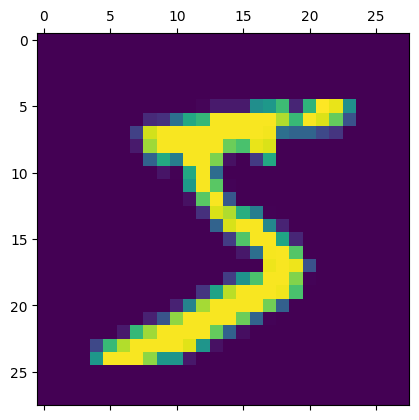

In [9]:
plt.matshow(X_train[0])

In [10]:
#Convert 2d matrix into single matrix
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    #create layers of neuron
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\Mohit Computers\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8134 - loss: 0.7157
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9149 - loss: 0.3074
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9233 - loss: 0.2748
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9248 - loss: 0.2734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9234 - loss: 0.2678


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9145 - loss: 0.3034


[0.26780492067337036, 0.9247999787330627]

In [15]:
y_predict=model.predict(X_test_flattened)
y_predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([3.5659116e-02, 4.4250291e-07, 4.9114306e-02, 9.7172731e-01,
       3.8725040e-03, 1.4362729e-01, 2.1235646e-06, 9.9989605e-01,
       1.2939821e-01, 6.7374349e-01], dtype=float32)

In [16]:
np.argmax(y_predict[0])

7

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm=tf.math.confusion_matrix(labels=y_test , predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    6,    3,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   8,   10,  917,   16,    8,    4,   13,   13,   41,    2],
       [   4,    0,   16,  922,    1,   24,    3,   11,   24,    5],
       [   1,    1,    4,    2,  921,    0,   10,    4,   11,   28],
       [  10,    3,    2,   31,   11,  773,   17,    7,   32,    6],
       [  14,    3,    5,    1,    7,   11,  913,    2,    2,    0],
       [   1,    5,   21,    7,    8,    0,    0,  956,    4,   26],
       [   5,    7,    7,   23,    9,   24,    9,   12,  872,    6],
       [  10,    7,    1,   10,   30,    6,    0,   31,   11,  903]])>

Text(95.72222222222221, 0.5, 'Truth')

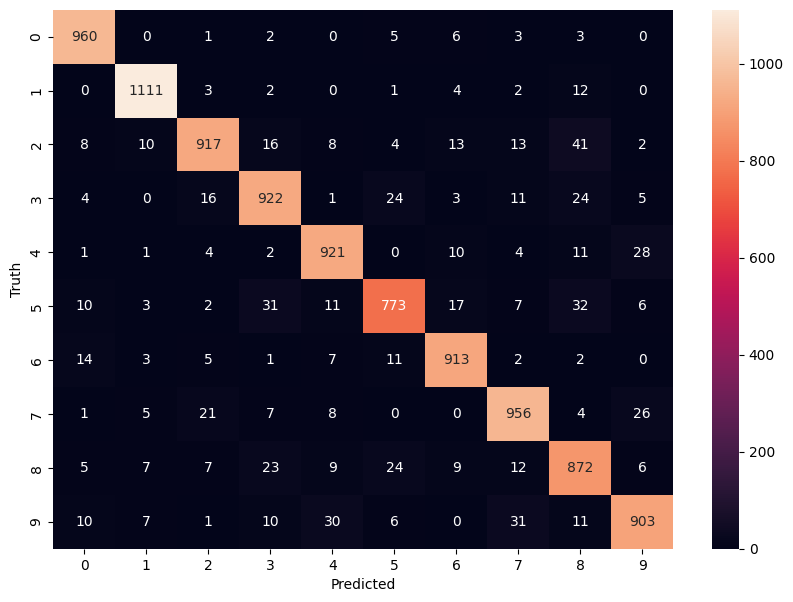

In [20]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
#Create hidden layers
model = keras.Sequential([
    #create layers of neuron
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8746 - loss: 0.4523
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9638 - loss: 0.1232
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9740 - loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9798 - loss: 0.0671
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9858 - loss: 0.0481


In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9651 - loss: 0.1141


[0.09575119614601135, 0.9721999764442444]

Text(95.72222222222221, 0.5, 'Truth')

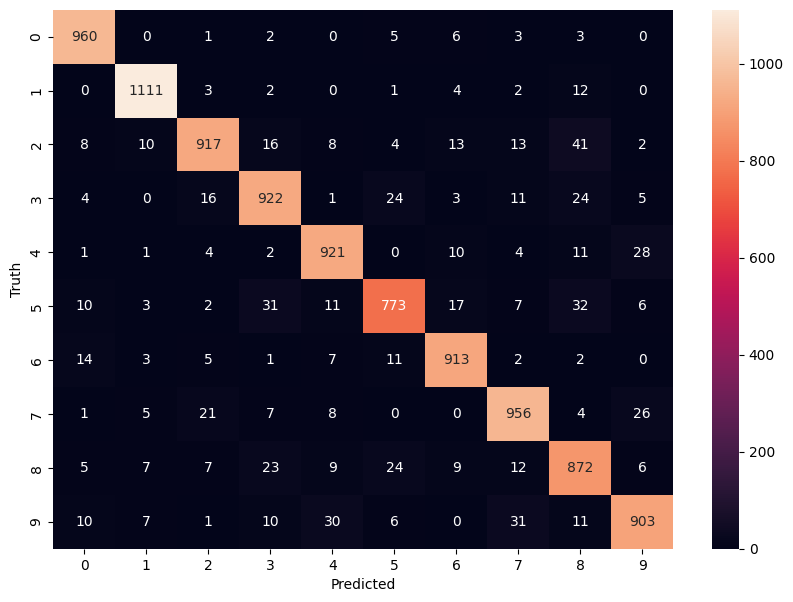

In [24]:
cm=tf.math.confusion_matrix(labels=y_test , predictions=y_predict_labels)
plt.figure(figsize=(10,7))
sb.heatmap(cm , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')